In [2]:
import tensorflow as tf
physicaldevice = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
tf.config.experimental.set_memory_growth(physicaldevice[0],True)

Num GPUs Available:  1


In [203]:
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

# Read Data from CSV files

In [178]:
datas = pd.read_csv("C:\\Users\\abdul\\Downloads\\house-prices-advanced-regression-techniques\\train.csv")
datas.set_index("Id",inplace=True)

# Quick EDA

In [179]:
from jcopml.plot import plot_missing_value

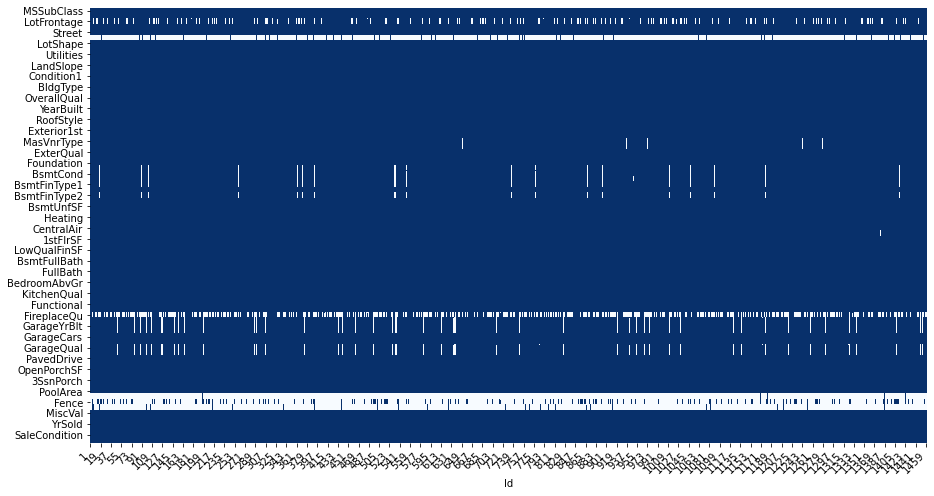

In [180]:
# clean null value
# if null >= 0.4 remove columns
plot_missing_value(datas)

In [181]:
jumlahData = datas.count()["MSSubClass"]
for col in datas.columns:
    nulldata = datas[col].isna().sum()
    if nulldata > 0:
        if (nulldata/jumlahData) >= 0.4 :
            datas.drop(columns=[col],inplace=True)

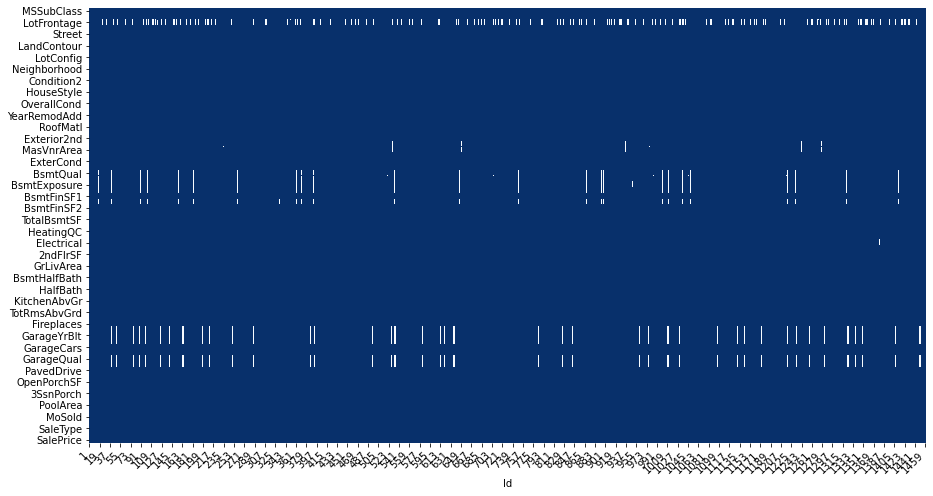

In [182]:
# after Delete columns
plot_missing_value(datas)

In [183]:
# encode for categorical datas
for column in datas.columns:
    if str(datas[column].dtype) == "object" or str(datas[column].dtype)=="int64" and column !="SalePrice" :
        datas = pd.concat([datas,pd.get_dummies(datas[column], prefix=column)],axis=1)
        datas.drop(columns=[column],inplace=True)

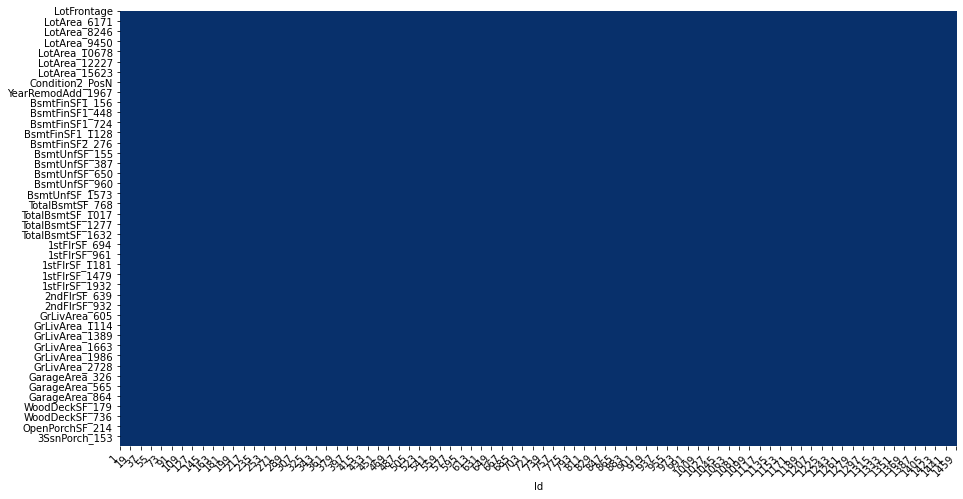

In [185]:
plot_missing_value(datas)

In [186]:
# split dataset
train_dataset = datas.sample(frac=0.8,random_state=0)
test_dataset = datas.drop(train_dataset.index)

In [191]:
# set labels
train_labels = train_dataset.pop('SalePrice')
test_labels = test_dataset.pop('SalePrice')

In [193]:
ef build_model():
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])
    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(loss='mse',
                    optimizer=optimizer,
                    metrics=['mae', 'mse'])
    return model

In [197]:
model = build_model()

In [204]:
EPOCHS = 1000
history = model.fit(
  train_dataset, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:34642075648.0000,  mae:167618.7344,  mse:34642075648.0000,  val_loss:37418254336.0000,  val_mae:174775.6094,  val_mse:37418254336.0000,  
....................................................................................................
Epoch: 100, loss:33641205760.0000,  mae:164606.1250,  mse:33641205760.0000,  val_loss:36373667840.0000,  val_mae:171761.2500,  val_mse:36373667840.0000,  
....................................................................................................
Epoch: 200, loss:32566290432.0000,  mae:161308.0625,  mse:32566290432.0000,  val_loss:35251200000.0000,  val_mae:168462.0312,  val_mse:35251200000.0000,  
....................................................................................................
Epoch: 300, loss:31423453184.0000,  mae:157725.6406,  mse:31423453184.0000,  val_loss:34056603648.0000,  val_mae:164878.3125,  val_mse:34056603648.0000,  
..............................................................................

In [201]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,3.469000e+10,167761.78125,3.469000e+10,3.746816e+10,174918.312500,3.746816e+10,995
996,3.468041e+10,167732.96875,3.468041e+10,3.745830e+10,174890.125000,3.745830e+10,996
997,3.467084e+10,167704.53125,3.467084e+10,3.744810e+10,174860.953125,3.744810e+10,997
998,3.466128e+10,167675.78125,3.466128e+10,3.743837e+10,174833.140625,3.743837e+10,998
999,3.465172e+10,167647.40625,3.465172e+10,3.742834e+10,174804.468750,3.742834e+10,999
